**Advanced** **Visualization**

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pandas as pd
from google.colab import files

In [0]:
uploaded = files.upload()

Saving DeepLearning_ANN_True.csv to DeepLearning_ANN_True.csv


In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "DeepLearning_ANN_True.csv" with length 29594 bytes


In [0]:
uploaded

{'DeepLearning_ANN_True.csv': b'criteria_name,id_number,spouse_id,record_type_desc,record_status_desc,last_name,first_name,Preferred_City,Preferred_State,Preferred_Zip,Preferred_Foreign_City_Zip,Preferred_Country,Years_Giving_Commitments,Years_Giving_Cash,Lifetime_Cash,Lifetime_Commitments,DR_Commitments,Campaign_for_OSU_Commitments,Lifetime_Athletics,Lifetime_Our_Beaver_Nation,last_transaction_date,last_transaction_amount,last_allocation,Most_Recent_Max_Gift_Amount,Most_Recent_Max_Gift_Date,Count_of_Gifts_This_Amount,rating_desc,osuaa_member,Affinity_Score,Discovery_Pool_Flag,Count_OSUF_events_attended_in_last_10_yrs,Count_OSU_events_attended_in_last_10_yrs,Engaged_in_current_FY,Student_Activities,Previous_relationship_manager,Date_Previous_relationship_manager_Dropped,Age_In_Years,gender,engaged_in_current_Campaign,Social_Media_Engaged,Gave_Major_Gift,ANN_Prediction\r\nSR_DeepLearning_ANN,1204400,10094986,Alumnus/na,Active,Jordan,Dennis,Albany,OR,97321-1458,,USA,20,20,"3,409.50","3,4

In [0]:
# Importing the dataset
dataset = pd.read_csv('DeepLearning_ANN_True.csv')

In [0]:
dataset.head()

,criteria_name,id_number,spouse_id,record_type_desc,record_status_desc,last_name,first_name,Preferred_City,Preferred_State,Preferred_Zip,Preferred_Foreign_City_Zip,Preferred_Country,Years_Giving_Commitments,Years_Giving_Cash,Lifetime_Cash,Lifetime_Commitments,DR_Commitments,Campaign_for_OSU_Commitments,Lifetime_Athletics,Lifetime_Our_Beaver_Nation,last_transaction_date,last_transaction_amount,last_allocation,Most_Recent_Max_Gift_Amount,Most_Recent_Max_Gift_Date,Count_of_Gifts_This_Amount,rating_desc,osuaa_member,Affinity_Score,Discovery_Pool_Flag,Count_OSUF_events_attended_in_last_10_yrs,Count_OSU_events_attended_in_last_10_yrs,Engaged_in_current_FY,Student_Activities,Previous_relationship_manager,Date_Previous_relationship_manager_Dropped,Age_In_Years,gender,engaged_in_current_Campaign,Social_Media_Engaged,Gave_Major_Gift,ANN_Prediction
0,SR_DeepLearning_ANN,1204400,10094986.0,Alumnus/na,Active,Jordan,Dennis,Albany,OR,97321-1458,NaN,USA,20,20,"3,409.50","3,409.50","3,409.50",500,13,675,10/6/2005,250,Dean's Fund for Excellence in the College of B...,300,12/10/1998,2.0,NaN,N,11,N,0,0,NaN,NaN,NaN,NaN,65,M,Y,Y,NaN,True
1,SR_DeepLearning_ANN,1205721,10146053.0,Alumnus/na,Active,Thayer,Marc,Middletown,RI,02842-5503,NaN,USA,25,25,"1,302.00","1,302.00","1,302.00",850,NaN,NaN,9/20/2013,300,Dean's Fund for Excellence & Innovation in the...,300,9/20/2013,1.0,"91 $50,000 - $99,999",N,5,Y,0,0,NaN,NaN,NaN,NaN,68,M,N,N,NaN,True
2,SR_DeepLearning_ANN,1208642,1215831.0,Alumnus/na,Active,Speulda,Susan,Philomath,OR,97370,NaN,USA,19,19,"1,467.00","1,467.00","1,467.00","1,190.00",NaN,NaN,12/2/2014,100,OSU Marching/Winter/Spring Bands Fund,300,6/24/2008,2.0,"92 $25,000 - $49,999",N,23,Y,0,1,NaN,"CLA Music/Band, HON Talons, OTH Past Student L...",NaN,NaN,64,F,Y,Y,NaN,True
3,SR_DeepLearning_ANN,1209149,10213876.0,Alumnus/na,Active,Powers,Fred,Beaverton,OR,97005-1549,NaN,USA,14,14,"10,420.00","10,420.00","10,420.00","6,800.00",100,"9,900.00",11/3/2014,200,Our Beaver Nation Fund,"1,400.00",12/14/2007,3.0,"92 $25,000 - $49,999",N,12,N,0,0,NaN,"GRK Delta Upsilon, HON Kappa Psi",NaN,NaN,65,M,Y,Y,NaN,True
4,SR_DeepLearning_ANN,1212932,NaN,Alumnus/na,Active,Steers,Timothy,Portland,OR,97239,NaN,USA,20,20,"17,814.50","18,814.50","18,814.50","12,650.00",200,"18,608.00",8/20/2009,"2,500.00",Our Beaver Nation Fund,"3,500.00",6/6/2007,2.0,"93 $10,000 - $24,999",N,13,N,0,0,NaN,GRK Delta Tau Delta,Ms. Maria Schell,6/24/2011,64,M,Y,Y,NaN,True


In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 42 columns):
criteria_name                                 110 non-null object
id_number                                     110 non-null int64
spouse_id                                     56 non-null float64
record_type_desc                              110 non-null object
record_status_desc                            110 non-null object
last_name                                     110 non-null object
first_name                                    110 non-null object
Preferred_City                                110 non-null object
Preferred_State                               110 non-null object
Preferred_Zip                                 110 non-null object
Preferred_Foreign_City_Zip                    0 non-null float64
Preferred_Country                             110 non-null object
Years_Giving_Commitments                      110 non-null int64
Years_Giving_Cash                       

In [0]:
# Column Headings

print(list(dataset.columns))

['criteria_name', 'id_number', 'spouse_id', 'record_type_desc', 'record_status_desc', 'last_name', 'first_name', 'Preferred_City', 'Preferred_State', 'Preferred_Zip', 'Preferred_Foreign_City_Zip', 'Preferred_Country', 'Years_Giving_Commitments', 'Years_Giving_Cash', 'Lifetime_Cash', 'Lifetime_Commitments', 'DR_Commitments', 'Campaign_for_OSU_Commitments', 'Lifetime_Athletics', 'Lifetime_Our_Beaver_Nation', 'last_transaction_date', 'last_transaction_amount', 'last_allocation', 'Most_Recent_Max_Gift_Amount', 'Most_Recent_Max_Gift_Date', 'Count_of_Gifts_This_Amount', 'rating_desc', 'osuaa_member', 'Affinity_Score', 'Discovery_Pool_Flag', 'Count_OSUF_events_attended_in_last_10_yrs', 'Count_OSU_events_attended_in_last_10_yrs', 'Engaged_in_current_FY', 'Student_Activities', 'Previous_relationship_manager', 'Date_Previous_relationship_manager_Dropped', 'Age_In_Years', 'gender', 'engaged_in_current_Campaign', 'Social_Media_Engaged', 'Gave_Major_Gift', 'ANN_Prediction']


In [0]:
dataset.set_index('id_number')
dataset.id_number.count()

110

In [0]:
# donors will likely give with more than 50% chance

pd.value_counts(dataset['ANN_Prediction'].values, sort='More than 50%')

True    110
dtype: int64

**Data Visualization**

In [0]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

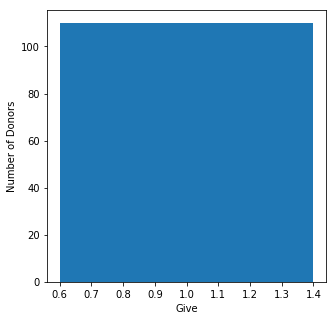

In [0]:
# Donors that would likely give

left=dataset.groupby('ANN_Prediction').count()
plt.figure(figsize=(5,5))
plt.bar(left.index.values, left['id_number'])
plt.xlabel('Give')
plt.ylabel('Number of Donors')
plt.show()

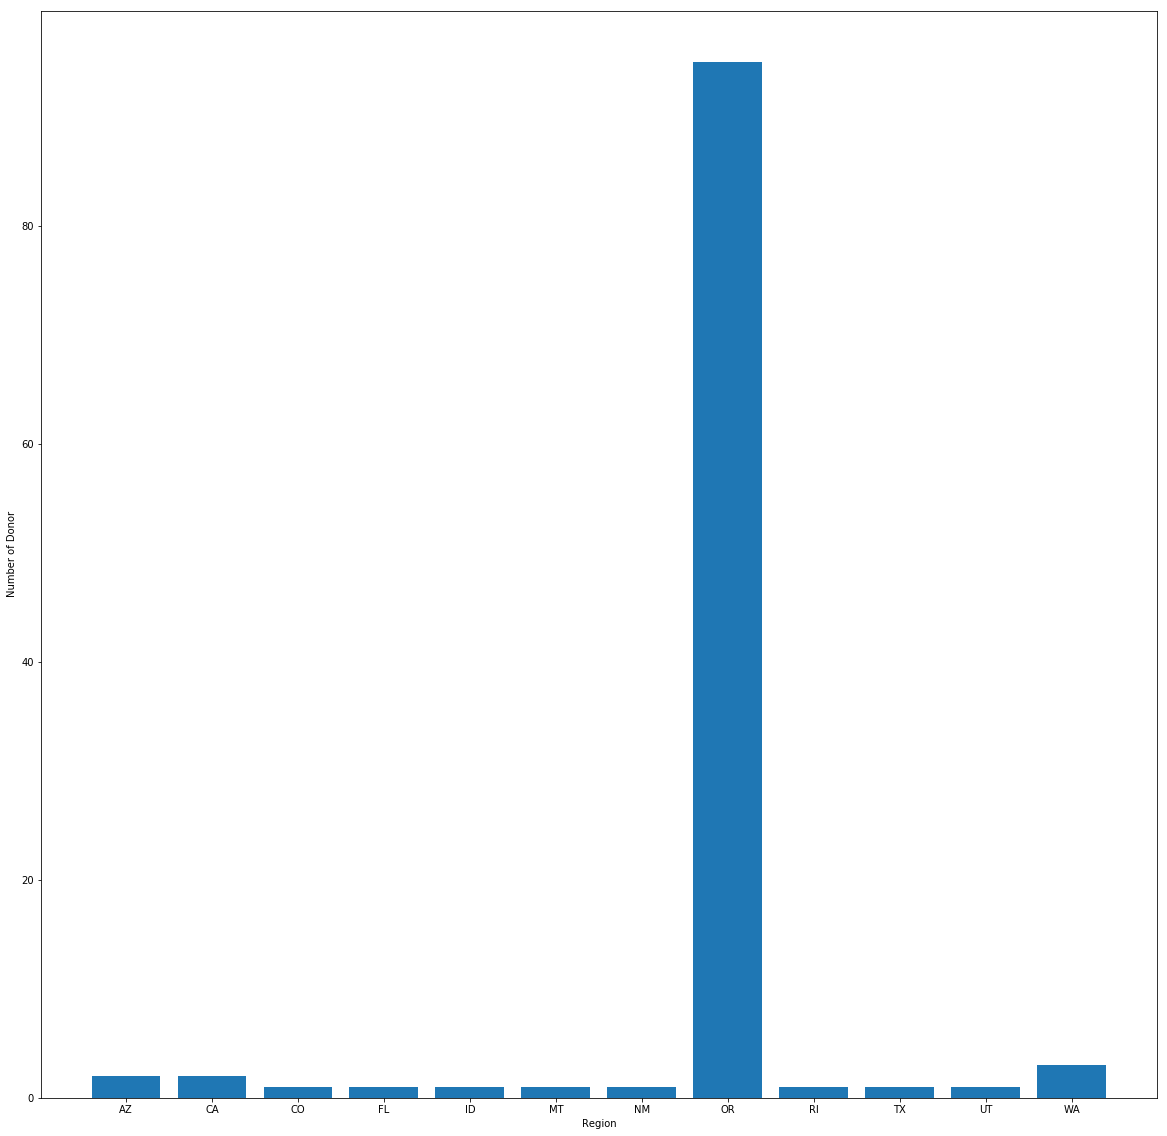

In [0]:
#  Number of costumer from each state


region=dataset.groupby('Preferred_State').count()
fig=plt.subplots(figsize=(20,20))
plt.bar(region.index.values, region['id_number'])
plt.xlabel('Region')
plt.ylabel('Number of Donor')
plt.show()


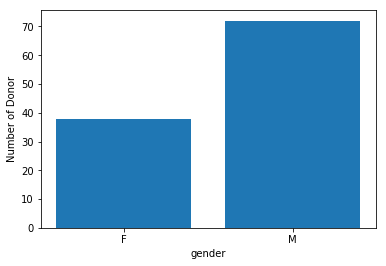

In [0]:
# Total count of Donors based on Gender


gender=dataset.groupby('gender').count()
plt.bar(gender.index.values, gender['id_number'])
plt.xlabel('gender')
plt.ylabel('Number of Donor')
plt.show()

In [0]:
# Total count Based on Gender

pd.value_counts(dataset['gender'].values, sort='M')

M    72
F    38
dtype: int64

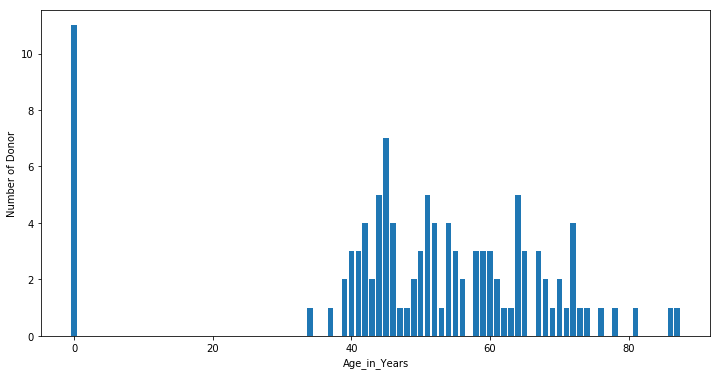

In [0]:
# Total count of Donor based on Different AgeGroup

age=dataset.groupby('Age_In_Years').count()
plt.figure(figsize=(12,6))
plt.bar(age.index.values, age['id_number'])
plt.xlabel('Age_in_Years')
plt.ylabel('Number of Donor')
plt.show()

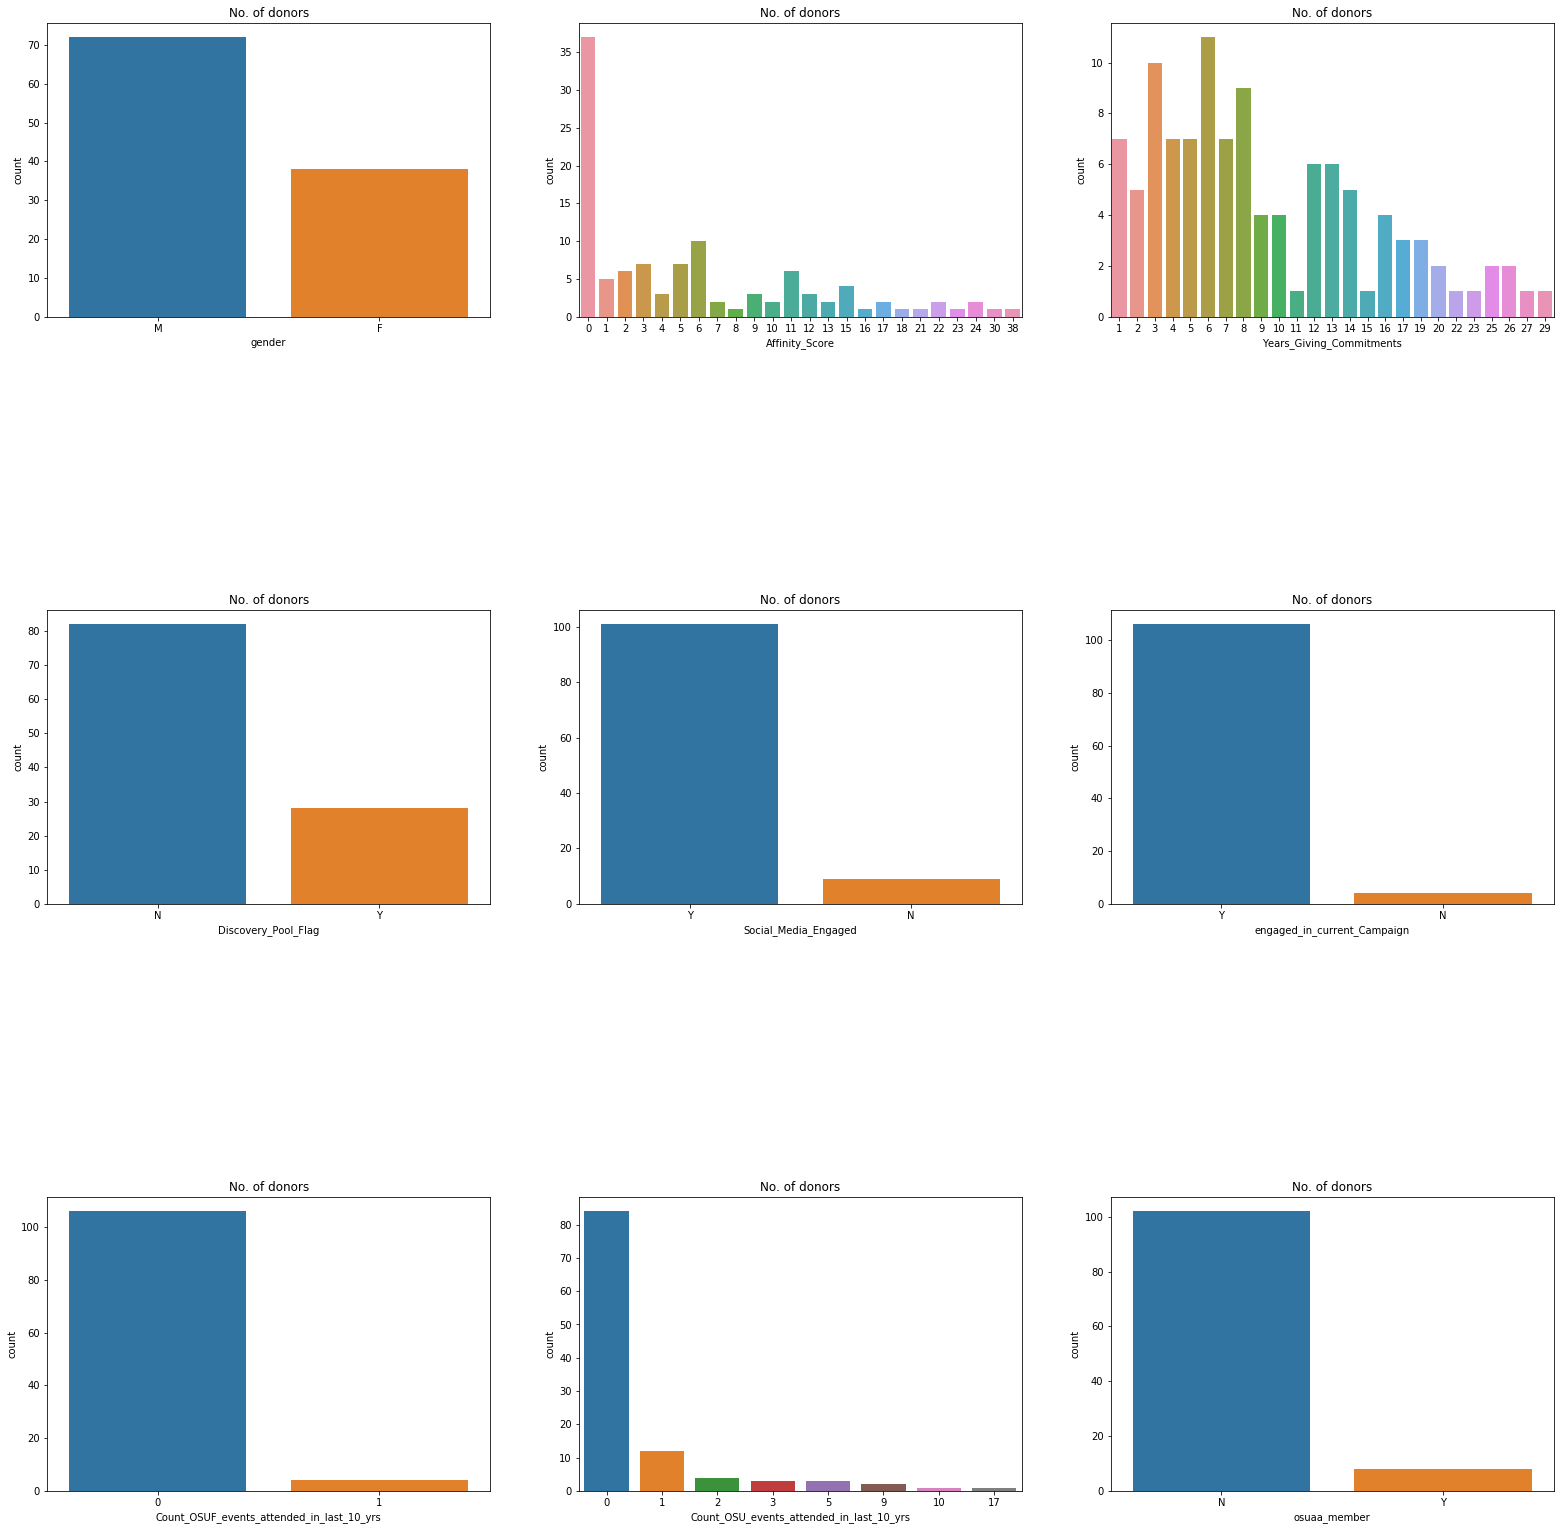

In [0]:
# Subplots For various parameters 

features=['gender','Affinity_Score', 'Years_Giving_Commitments', 'Discovery_Pool_Flag', 'Social_Media_Engaged', 'engaged_in_current_Campaign', 'Count_OSUF_events_attended_in_last_10_yrs', 'Count_OSU_events_attended_in_last_10_yrs', 'osuaa_member' ]
fig=plt.subplots(figsize=(27,27))
for i, j in enumerate(features):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = dataset)
    plt.title("No. of donors")

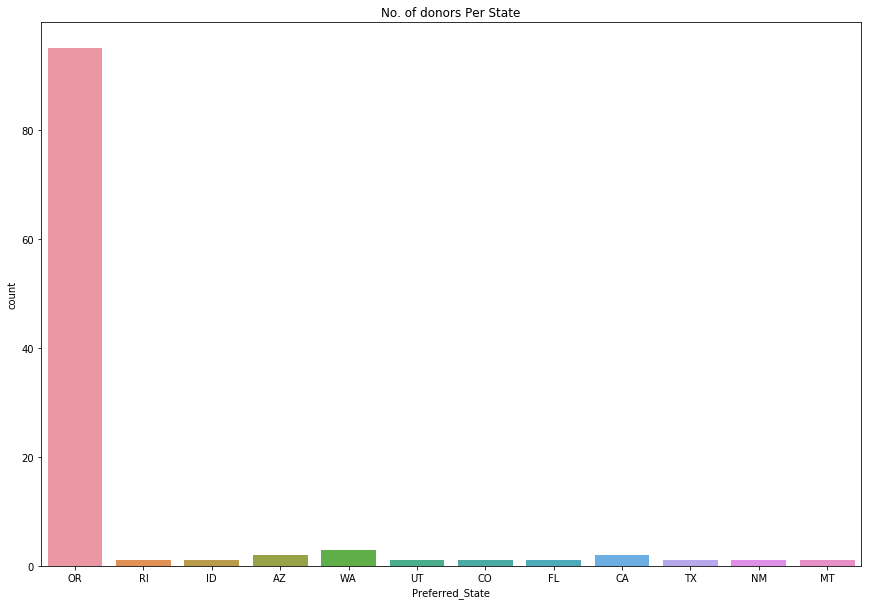

In [0]:
features=[ 'Preferred_State']
fig=plt.subplots(figsize=(50,50))
for i, j in enumerate(features):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = dataset)
    plt.title("No. of donors Per State")

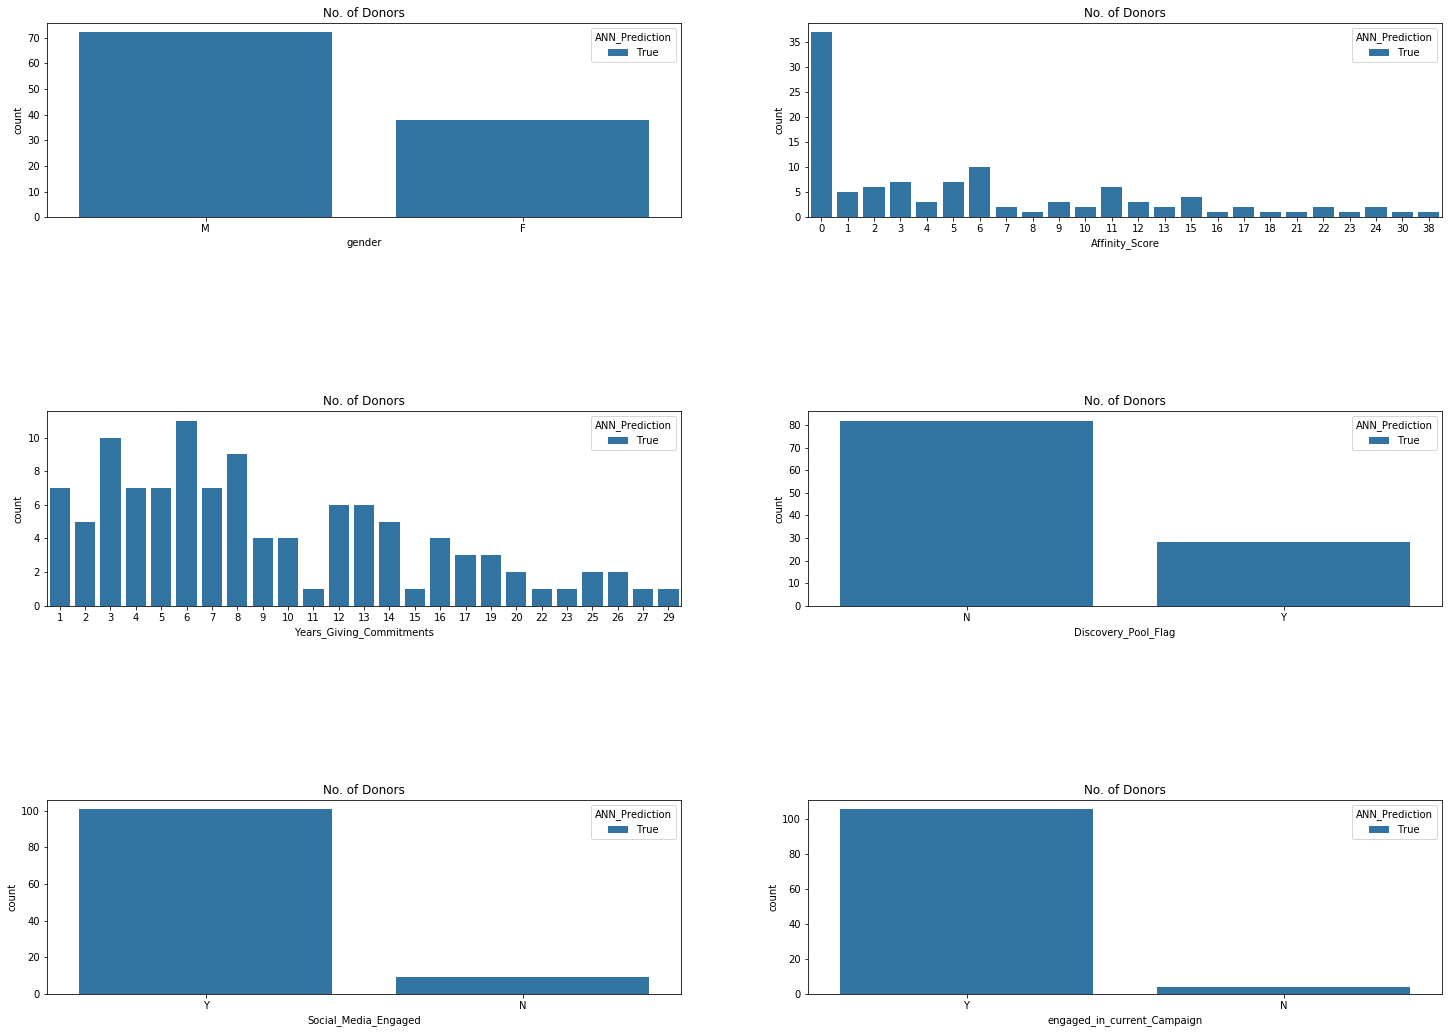

In [0]:
# plot based on Number of Donors  based on ANN_Prediction (More than 50% would likely to donate & Lsee than 50% would likely to donate)
features=['gender','Affinity_Score', 'Years_Giving_Commitments', 'Discovery_Pool_Flag', 'Social_Media_Engaged', 'engaged_in_current_Campaign']
fig=plt.subplots(figsize=(25,25))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = dataset, hue='ANN_Prediction')
    plt.title("No. of Donors")